In [1]:
# Load in all dependencies and helper functions from the main folder
import sys
sys.path.append('..//')
from utils import *

Using TensorFlow backend.


GPU availbility: ['/job:localhost/replica:0/task:0/device:GPU:0']


# Load in validation set

In [2]:
X_val = pickle_loader(['X_val'])

Loading: X_val


In [3]:
df = pd.read_csv(MST_PATH + 'df_val.csv')
df.head()

,id,coord_x,coord_y,path,sharpness,participant,task,webGazerX,webGazerY
0,P_39_||_1492629177607_13_-study-benefits_of_ru...,0.666161,0.506861,D:\david_thesis\0_data_lan\datasets\mst\stitch...,5.06900,P_39,1492629177607_13_-study-benefits_of_running_wr...,0.563194,0.407778
1,P_39_||_1492629177607_21_-study-educational_ad...,0.806306,0.354572,D:\david_thesis\0_data_lan\datasets\mst\stitch...,4.69625,P_39,1492629177607_21_-study-educational_advantages...,0.959028,0.561111
2,P_01_||_1491423217564_18_-study-benefits_of_ru...,0.415638,1.212381,D:\david_thesis\0_data_lan\datasets\mst\stitch...,3.68775,P_01,1491423217564_18_-study-benefits_of_running_wr...,0.172222,0.398889
3,P_01_||_1491423217564_27_-study-where_to_find_...,0.134066,0.328965,D:\david_thesis\0_data_lan\datasets\mst\stitch...,4.50575,P_01,1491423217564_27_-study-where_to_find_morel_mu...,0.179861,0.403333
4,P_40_||_1492693878775_32_-study-tooth_abscess_...,0.759732,0.269527,D:\david_thesis\0_data_lan\datasets\mst\stitch...,4.46025,P_40,1492693878775_32_-study-tooth_abscess_writing....,0.625000,0.304167


# Load in trained model

In [4]:
# Define model name
BATCH_SIZE = 128
INIT_LR = 1e-5
model_name = "mobile(mae)_adam_"+str(BATCH_SIZE)+"_"+str(INIT_LR)
base_filepath = MODEL_SAVE_PATH + model_name + ".hdf5"
print(base_filepath)

D:\david_xu_thesis\4_models\0_saved_models\mobile(mae)_adam_128_1e-05.hdf5


In [5]:
# Loading the best model
model = load_model(base_filepath)

In [6]:
val_pred_xy = model.predict(X_val, batch_size=BATCH_SIZE, verbose=1)

54976/54976 [==============================] - 15s 282us/step


# Model Assessment

In [7]:
# Append prediction to df_val
df['val_pred_x'] = val_pred_xy[0]
df['val_pred_y'] = val_pred_xy[1]
df['residual_x'] = df['coord_x'] - df['val_pred_x']
df['residual_y'] = df['coord_y'] - df['val_pred_y']

In [8]:
# MAE in x direction: 0.09869 MAE in y direction: 0.1214
old_x_residual = df['residual_x']
old_y_residual = df['residual_y']
print("MAE in x direction:", round(np.mean(abs(df['residual_x'])),5), \
      "MAE in y direction:",  round(np.mean(abs(df['residual_y'])),5))

MAE in x direction: 0.10294 MAE in y direction: 0.13674


[(-0.2, 2.2)]

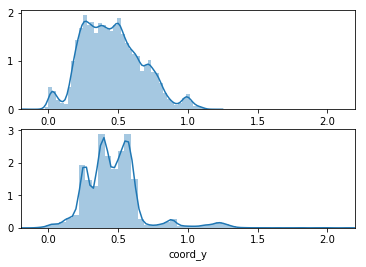

In [9]:
f, axes = plt.subplots(2,1)
g1 = sns.distplot(df['coord_x'], ax = axes[0])
g1.set(xlim = (-0.2, 2.2))
g2 = sns.distplot(df['coord_y'], ax = axes[1])
g2.set(xlim = (-0.2, 2.2))

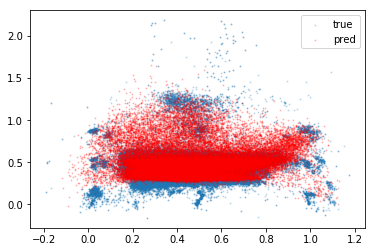

In [10]:
plt.scatter(df['coord_x'], df['coord_y'], s = 1, alpha = 0.2, label = 'true')
plt.scatter(df['val_pred_x'], df['val_pred_y'], s = 1, c = 'r', alpha = 0.2, label = 'pred')
plt.legend()

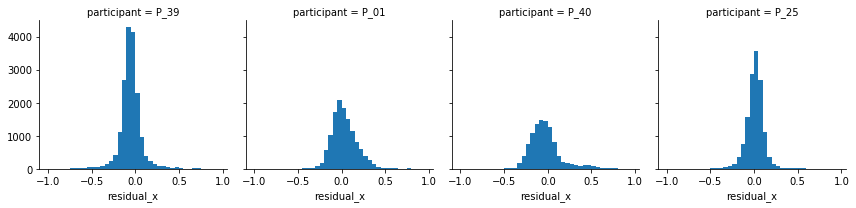

In [11]:
bins = np.arange(-1, 1, 0.05)
g = sns.FacetGrid(df, col="participant")
g = g.map(plt.hist, "residual_x", bins=bins)

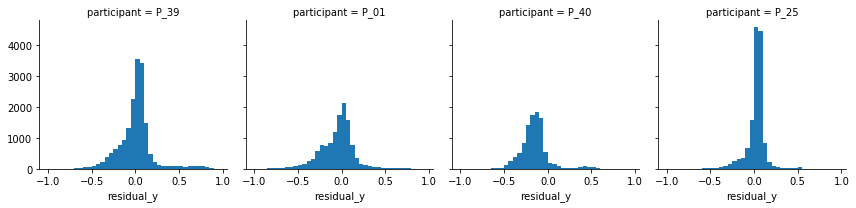

In [12]:
bins = np.arange(-1, 1, 0.05)
g = sns.FacetGrid(df, col="participant")
g = g.map(plt.hist, "residual_y", bins=bins)

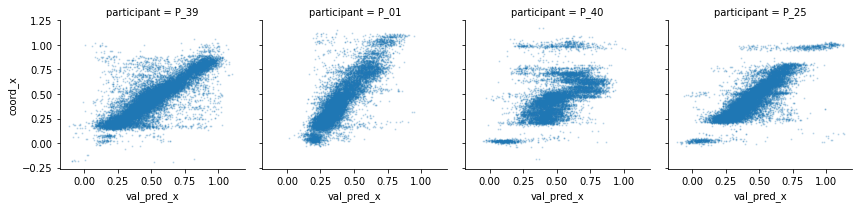

In [13]:
g = sns.FacetGrid(df, col="participant")
g = g.map(plt.scatter, "val_pred_x", "coord_x", s = 1, alpha = .2)

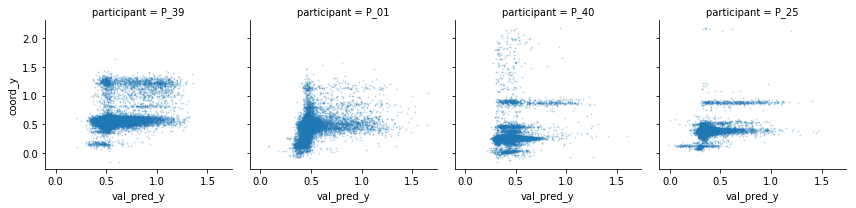

In [14]:
g = sns.FacetGrid(df, col="participant")
g = g.map(plt.scatter, "val_pred_y", "coord_y", s = 1, alpha = .2)

# Clip the prediction and actual values 

If we bound the values to all 0 and 1 in both x and y directions, we observe a significant increase in performance in the y-direction.

In [15]:
# MAE in x direction: 0.0981 MAE in y direction: 0.11214
df['coord_x'] = np.clip(df['coord_x'], 0, 1)
df['coord_y'] = np.clip(df['coord_y'], 0, 1)
df['val_pred_x'] = np.clip(df['val_pred_x'], 0, 1)
df['val_pred_y'] = np.clip(df['val_pred_y'], 0, 1)
df['residual_x'] = df['coord_x'] - df['val_pred_x']
df['residual_y'] = df['coord_y'] - df['val_pred_y']
print("MAE in x direction:", round(np.mean(abs(df['residual_x'])),5), \
      "MAE in y direction:",  round(np.mean(abs(df['residual_y'])),5))

MAE in x direction: 0.10226 MAE in y direction: 0.12729


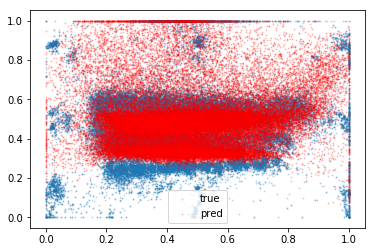

In [16]:
plt.scatter(df['coord_x'], df['coord_y'], s = 1, alpha = 0.2, label = 'true')
plt.scatter(df['val_pred_x'], df['val_pred_y'], s = 1, c = 'r', alpha = 0.2, label = 'pred')
plt.legend()

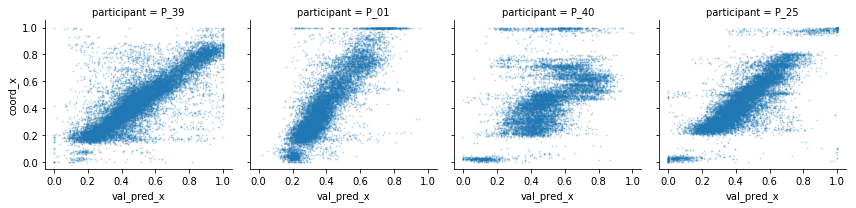

In [17]:
g = sns.FacetGrid(df, col="participant")
g = g.map(plt.scatter, "val_pred_x", "coord_x", s = 1, alpha = .2)

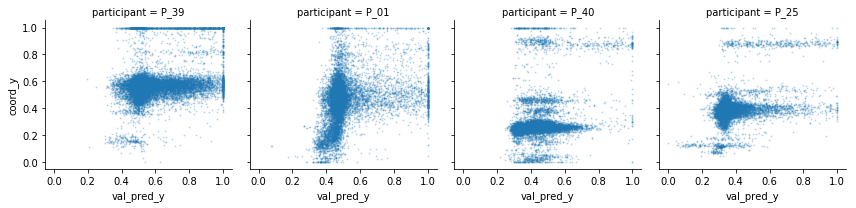

In [18]:
g = sns.FacetGrid(df, col="participant")
g = g.map(plt.scatter, "val_pred_y", "coord_y", s = 1, alpha = .2)

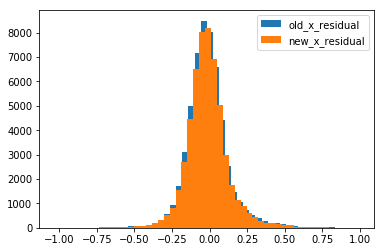

In [19]:
plt.hist(old_x_residual, label = 'old_x_residual', bins = 50)
plt.hist(df['residual_x'], label = 'new_x_residual', bins = 50)
plt.legend()

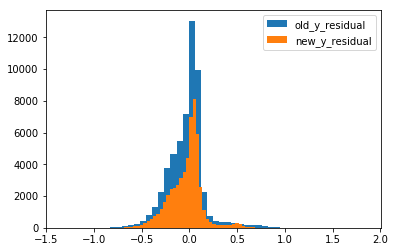

In [20]:
plt.hist(old_y_residual, label = 'old_y_residual', bins = 50)
plt.hist(df['residual_y'], label = 'new_y_residual', bins = 50)
plt.legend()

# Compare CNN with WebGazer

In [21]:
df['webGazerX'] = np.clip(df['webGazerX'], 0, 1)
df['webGazerY'] = np.clip(df['webGazerY'], 0, 1)
df['webgazer_residual_x'] = df['coord_x'] - df['webGazerX']
df['webgazer_residual_y'] = df['coord_y'] - df['webGazerY']

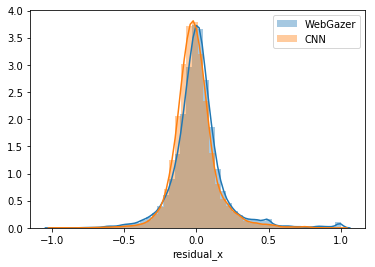

In [22]:
sns.distplot(df['webgazer_residual_x'], bins = 50, label = 'WebGazer')
sns.distplot(df['residual_x'],bins = 50, label = 'CNN')
plt.legend()

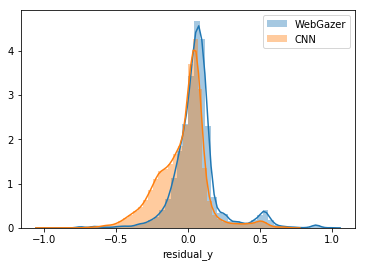

In [23]:
sns.distplot(df['webgazer_residual_y'], bins = 50, label = 'WebGazer')
sns.distplot(df['residual_y'],bins = 50, label = 'CNN')
plt.legend()

In [24]:
# Define a single metric for both models:
df['webGazer_score'] = (df['webgazer_residual_x']**2 + df['webgazer_residual_y']**2)**0.5
df['CNN_score'] = (df['residual_x']**2 + df['residual_y']**2)**0.5

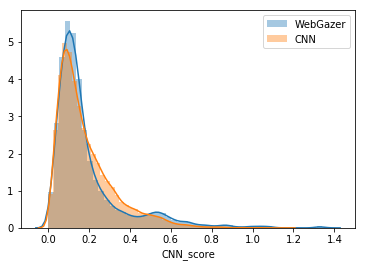

In [25]:
sns.distplot(df['webGazer_score'], bins = 50, label = 'WebGazer')
sns.distplot(df['CNN_score'],bins = 50, label = 'CNN')
plt.legend()

In [26]:
np.mean(df['CNN_score'] < df['webGazer_score'])

0.49967258440046564

In [27]:
np.mean(df['residual_x'] < df['webgazer_residual_x'])

0.5638824214202561

In [28]:
np.mean(df['residual_y'] < df['webgazer_residual_y'])

0.7499818102444703

In [29]:
df['cnn_better'] = df['CNN_score'] < df['webGazer_score']
df.groupby('participant').mean()['cnn_better']

participant
P_01    0.464138
P_25    0.520349
P_39    0.588820
P_40    0.362645
Name: cnn_better, dtype: float64

In [30]:
df.groupby('task').mean()['cnn_better']

task
1491423217564_18_-study-benefits_of_running_writing.webm_frames                                  0.584723
1491423217564_24_-study-educational_advantages_of_social_networking_sites_writing.webm_frames    0.400403
1491423217564_27_-study-where_to_find_morel_mushrooms_writing.webm_frames                        0.384929
1491423217564_29_-study-where_to_find_morel_mushrooms_writing.webm_frames                        0.436860
1491423217564_33_-study-tooth_abscess_writing.webm_frames                                        0.492913
1491423217564_35_-study-dot_test_final.webm_frames                                               0.748318
1491423217564_3_-study-dot_test.webm_frames                                                      0.329960
1492110782158_10_-study-benefits_of_running_writing.webm_frames                                  0.637084
1492110782158_14_-study-educational_advantages_of_social_networking_sites_writing.webm_frames    0.433221
1492110782158_17_-study-where_to_find_mor